# Modeleren van een rupsenuitbraak met de logistische vergelijking

In het vorige hoofdstuk bekeken we het exponentiële groeimodel om een populatie bladluizen voor te stellen. We stelden hierbij vast dat we ooit op een limiet moeten botsen: een tuin heeft geen onbeperkte draagkracht! In dit hoofdstuk bekijken we daarom de logistische groei. Dit model heeft een verrassende eigenschap: het kan chaotisch zijn, waardoor het voor bepaalde waarden totaal onvoorspelbaar is!

We zoeken een regel die rekening houdt met de draagkracht van het systeem. We verwachten dat wanneer de populatiegrootte klein is, en er dus veel planten per rups zijn, onbelemmerde groei mogelijk is. Wanneer het aantal rupsen dicht bij de draagkracht $K$ komt, moet de groei stoppen. De regel die we voorstellen is de volgende:

$$x_t = r \cdot \left(1 - \frac{x_{t - 1}}{K}\right) \cdot x_{t - 1}$$

Hier zien we dat als $x \approx 0$, het gedeelte tussen haakjes ongeveer gelijk is aan $1$. We bekomen dus terug (ongeveer) exponentiële groei. Wanneer $x \approx K$, dan is het deel tussen haakjes ongeveer gelijk aan $0$ en zal de populatiegrootte in de volgende stap ook $0$ zijn. De populatie stuikt in elkaar. Dit model noemen we een <em>logistisch model</em>.

Wiskundigen gebruiken gebruiken vaak het symbool $\sigma$ ("sigma") voor de logistische vergelijking:

$$\sigma(x) = r \cdot \left(1 - \frac{x}{K}\right)$$

Net als in het vorige hoofdstuk, kunnen we ook nu deze vergelijking omzetten in code:

In [1]:
def logistische_groei(x, r, K):
    return r * (1 - x / K) * x

Laat ons enkele stappen van de logisitische groei simuleren, met $x_0 = 5$, $r = 1.8$ en $K = 1000$:

In [2]:
x_0 = 5
r = 1.8
K = 1000

x_1 = logistische_groei(x_0, r, K)
print(x_1)

x_2 = logistische_groei(x_1, r, K)
print(x_2)

x_3 = logistische_groei(x_2, r, K)
print(x_3)

x_4 = logistische_groei(x_3, r, K)
print(x_4)

8.955
15.974654355
28.295036591828904
49.48996949297275


Vergelijk deze resultaten met deze van de exponentiele groei in het vorige hoofdstuk. Wat merk je op? De groei ziet er gelijkaardig uit, waarbij de logistische groei iets trager is. Dit komt omdat we na vier stappen nog erg ver van de draagkracht zitten: $\frac{49.49}{1000} \approx 0.05$. Laat ons even over een langer tijdsinterval kijken:

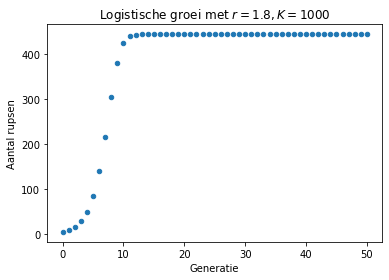

In [3]:
from matplotlib import pyplot as plt

x_data = list(range(51))
y_data = [5]
for t in range(50):
    y_data.append(logistische_groei(y_data[-1], r, K))
plt.scatter(x_data, y_data, 20)
plt.xlabel('Generatie')
plt.ylabel('Aantal rupsen')
plt.title('Logistische groei met $r = 1.8, K = 1000$')
plt.show()

Hier zien we een kwalitatief verschil met de exponentiele groei! In plaats van ongelimiteerd door te groeien begint de groei na ongeveer zeven generaties te temperen. Vanaf generatie 12 is de populatiegrootte stabiel op ongeveer 444 rupsen. Merk op dat dit flink minder is dan de draagkracht van het systeem!

De grootte waarnaar geconveergeerd wordt heet de evernwichtswaarde. We zullen dit noteren als $x_{eq}$ ("eq" staat voor equilibrium). Als de populatie op dat moment stabiel is, moet er gelden dat:

$$x_{eq} = r \left( 1 - \frac{x_{eq}}{K} \right) x_{eq}$$

We kunnen dit herschrijven als:

$$r x_{eq}^2 + K (1 - r) x_{eq} = 0$$

Dit is een kwadratische vergelijking van de vorm $a x^2 + b x + c = 0$. We vinden twee oplossingen:

- De triviale oplossing $x_{eq} = 0$. Indien er geen rupsen zijn, zal de populatie ook leeg blijven. Dit evenwicht is evenwel onstabiel: een enkele rups in het systeem kan de populatie op gang brengen (de biologie achter de voortplanting even buiten beschouwing gelaten).

- De oplossing $x_{eq} = K \frac{r - 1}{r}$, die we eerder konden vaststellen op basis van de hierboven getoonde grafiek. Dit evenwichtspunt is stabiel (voor deze specifieke groeisnelheid!), omdat we van verschillende startwaarden kunnen vertrekken en altijd op dezelfde waarde uitkomen:

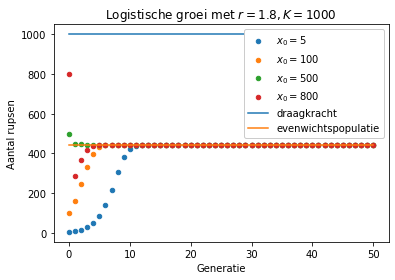

In [4]:
for x_0 in [5, 100, 500, 800]:
    x_data = list(range(51))
    y_data = [x_0]
    for t in range(50):
        y_data.append(logistische_groei(y_data[-1], r, K))
    plt.scatter(x_data, y_data, 20)
plt.plot([0, 50], [K, K])
x_eq = K * (r - 1) / r
plt.plot([0, 50], [x_eq, x_eq])
plt.legend(['$x_0 = 5$', '$x_0 = 100$', '$x_0 = 500$', '$x_0 = 800$', 'draagkracht', 'evenwichtspopulatie'],
          loc='upper right', framealpha=1)
plt.xlabel('Generatie')
plt.ylabel('Aantal rupsen')
plt.title('Logistische groei met $r = 1.8, K = 1000$')
plt.show()

## Schommelingen in de populatie

Wat als we andere waarden nemen voor de groeisnelheid? Indien we $r = 3.34$ gebruiken, zien we een compleet ander gedrag:

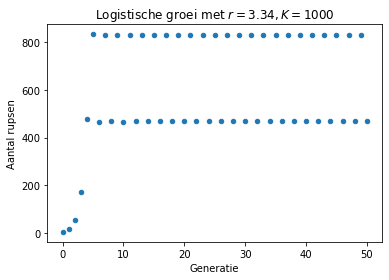

In [5]:
r = 3.34
x_data = list(range(51))
y_data = [5]
for t in range(50):
    y_data.append(logistische_groei(y_data[-1], r, K))
plt.scatter(x_data, y_data, 20)
plt.xlabel('Generatie')
plt.ylabel('Aantal rupsen')
plt.title('Logistische groei met $r = 3.34, K = 1000$')
plt.show()

We zien dat de populatie niet convergeert naar een evenwichtswaarde $x_{eq}$, maar een periodiek gedraag vertoont. De ene generatie is de populatiegrootte minder dan verwacht bij evenwicht, de volgende generatie terug meer, enzovoort. Hier zien we dat de populatiegrootte zich elke twee generaties herhaalt; dit noemen we een periode van twee.

## Opdracht 1

Genereer een gelijkaardige grafiek voor $r = 3.455$. Wat stel je nu vast?

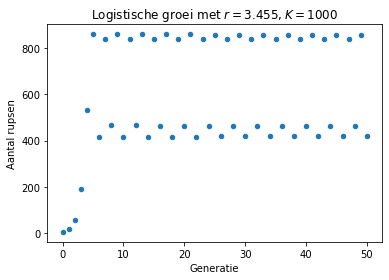

In [6]:
r = 3.455
x_data = list(range(51))
y_data = [5]
for t in range(50):
    y_data.append(logistische_groei(y_data[-1], r, K))
plt.scatter(x_data, y_data, 20)
plt.xlabel('Generatie')
plt.ylabel('Aantal rupsen')
plt.title('Logistische groei met $r = 3.455, K = 1000$')
plt.show()

Als alles goed is, neem je een periode van vier waar voor $r = 3.455$.

## Een wispelturige populatie

Logistische groei lijkt niet zo gecompliceerd: ofwel lijken we te convergeren naar een vaste waarde $x_{eq} = K \frac{r - 1}{r}$, ofwel gaat de populatie op en neer volgens een regelmatig patroon. Blijft deze groei makkelijk te voorspellen? Een groeisnelheid van $r = 3.6$ leert ons alvast van niet:

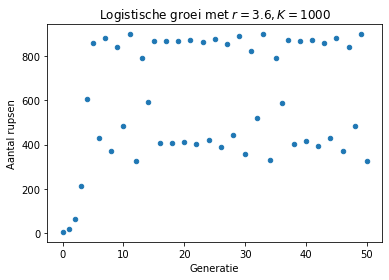

In [7]:
r = 3.6
x_data = list(range(51))
y_data = [5]
for t in range(50):
    y_data.append(logistische_groei(y_data[-1], r, K))
plt.scatter(x_data, y_data, 20)
plt.xlabel('Generatie')
plt.ylabel('Aantal rupsen')
plt.title('Logistische groei met $r = 3.6, K = 1000$')
plt.show()

Hier gaat de populatiegrootte op en neer, maar zonder enige regelmaat. Soms lijkt het alsof de grootte voor een tijdje gewoon terug oscilleert om dan plots het patroon te doorbreken. Wat gebeurt er als we verschillende startwaarden beschouwen?

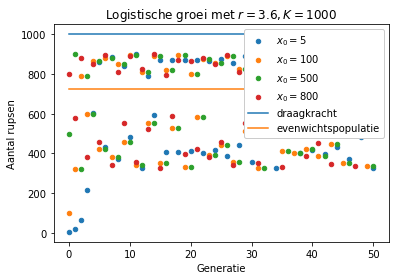

In [8]:
x_data = list(range(51))
for x_0 in [5, 100, 500, 800]:
    y_data = [x_0]
    for t in range(50):
        y_data.append(logistische_groei(y_data[-1], r, K))
    plt.scatter(x_data, y_data, 20)
plt.plot([0, 50], [K, K])
x_eq = K * (r - 1) / r
plt.plot([0, 50], [x_eq, x_eq])
plt.legend(['$x_0 = 5$', '$x_0 = 100$', '$x_0 = 500$', '$x_0 = 800$', 'draagkracht', 'evenwichtspopulatie'],
          loc='upper right', framealpha=1)
plt.xlabel('Generatie')
plt.ylabel('Aantal rupsen')
plt.title('Logistische groei met $r = 3.6, K = 1000$')
plt.show()

Hier zien we het omgekeerde van convergentie: de tijdsreeksen zijn compleet verschillend. Logisch denk je misschien, want ze zijn allemaal op compleet verschillende plaatsen begonnen. Wat als we de reeksen beginnen met startwaarden die licht van elkaar verschillen? We starten van $x_0 = 4.998, 4.999, 5, 5.001, 5.002$, en verwachten dat de reeksen ongeveer synchroon lopen. We verkrijgen volgende grafiek:

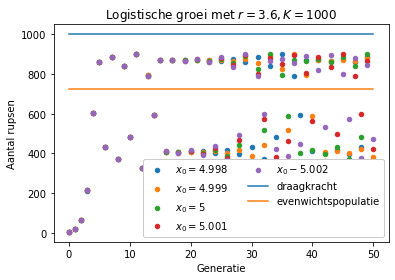

In [9]:
for x_0 in [4.998, 4.999, 5, 5.001, 5.002]:
    x_data = list(range(51))
    y_data = [x_0]
    for t in range(50):
        y_data.append(logistische_groei(y_data[-1], r, K))
    plt.scatter(x_data, y_data, 20)
plt.plot([0, 50], [K, K])
x_eq = K * (r - 1) / r
plt.plot([0, 50], [x_eq, x_eq])
plt.legend(['$x_0 = 4.998$', '$x_0 = 4.999$', '$x_0 = 5$', '$x_0 = 5.001$', '$x_0 - 5.002$', 'draagkracht', 'evenwichtspopulatie'],
          loc='lower right', framealpha=1, ncol=2)
plt.xlabel('Generatie')
plt.ylabel('Aantal rupsen')
plt.title('Logistische groei met $r = 3.6, K = 1000$')
plt.show()

De reeksen met verschillende startwaarden lopen inderdaad samen voor ongeveer 20 generaties. Daarna lopen de tijdreeksen weer helemaal verschillend.

## Opdracht 2

Probeer dit zelf eens in de terminal, door twee licht verschillende startwaarden $y_1$ en $y_2$ te kiezen. Simuleer beide populatiegroottes voor 50 generaties en print beide waarden telkens uit. Zie je het verschil?

In [10]:
y_1 = 5.006
y_2 = 5.007
for _ in range(50):
    y_1 = logistische_groei(y_1, r, K)
    y_2 = logistische_groei(y_2, r, K)
    print(round(y_1, 3), round(y_2, 3))

17.931 17.935
63.395 63.408
213.755 213.794
605.03 605.11
860.287 860.226
432.696 432.853
883.692 883.769
370.008 369.798
839.168 838.971
485.874 486.355
899.282 899.33
326.067 325.929
791.09 790.917
594.959 595.322
867.538 867.289
413.698 414.355
873.187 873.594
398.634 397.54
863.01 862.207
425.607 427.703
880.076 881.183
379.951 376.918
848.118 845.463
463.73 470.359
895.264 896.837
337.559 333.073
805.006 799.687
565.097 576.675
884.745 878.836
367.098 383.341
836.413 851.007
492.575 456.46
899.802 893.175
324.571 343.487
789.209 811.814
598.888 549.98
864.796 891.007
420.926 349.608
877.49 818.576
387.003 534.633
854.034 895.682
448.775 336.368
890.554 803.609
350.885 568.158
819.952 883.276
531.47 371.157
896.435 840.239
334.222 483.256
801.064 898.991
573.699 326.903


Voor bepaalde waarden van de groeisnelheid worden heel kleine verschillen in de populatiegrootte geamplificeerd. Dit gedrag wordt chaos genoemd: kleine verschillen in de startcondities leiden op termijn tot grote verschillen in de uitkomst. Indien onze rupsenpopulatie zich chaotisch zou gedragen, is het erg moeilijk om op lange termijn te voorspellen wat de populatiegrootte zal zijn.

## Een nieuw gezichtspunt

We zien dat de waarde van $r$ een sterke invloed uitoefent op het gedrag van de logistische groei. Een nieuwe soort figuur verschaft ons beter inzicht in wat er nu eigenlijk gebeurt. We plotten op de x-as $x_{t - 1}$ en op de y-as $x_t$, zodat we zien hoe de grootte verandert van de ene populatiegrootte tot de volgende. We beginnen met $r = 1.8$, het eenvoudig convergerend gedrag:

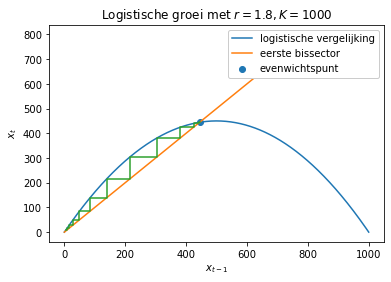

In [11]:
x_0 = 5
r = 1.8
x_data = list(range(1001))
y_data = [logistische_groei(x, r, K) for x in x_data]
plt.plot(x_data, y_data)
plt.plot([0, 800], [0, 800])
x_eq = K * (r - 1) / r
plt.scatter(x_eq, logistische_groei(x_eq, r, K))
x_data = [x_0]
for t in range(50):
    x_t = logistische_groei(x_data[-1], r, K)
    x_data += [x_t] * 2
plt.plot(x_data[:-1], x_data[1:])
plt.legend(['logistische vergelijking', 'eerste bissector', 'evenwichtspunt'],
           loc='upper right', framealpha=1)
plt.xlabel('$x_{t - 1}$')
plt.ylabel('$x_t$')
plt.title('Logistische groei met $r = 1.8, K = 1000$')
plt.show()

Merk op dat we twee hulplijnen getekend hebben. De eerste is de logistische vergelijking $\sigma(x) = r \left( 1 - \frac{x}{K} \right) x$, de tweede de eerste bissectrice die het vlak in twee snijdt. De laatste is nuttig omdat de waarde $x_t$ van de ene generatie de waarde $x_{t - 1}$ van de volgende generatie is. Door de evolutie van de populatie als een trap tussen deze twee curves voor te stellen, zien we hier hoe de populatie naar het snijpunt tussen de curves convergeert. Dit snijpunt komt overeen met de evenwichtspopulatie. Deze soort plot wordt soms poëtisch een "spinnenwebdiagram" genoemd.

## Opdracht 3

Doe nu hetzelfde voor $r = 3.34$. Wat stel je vast?

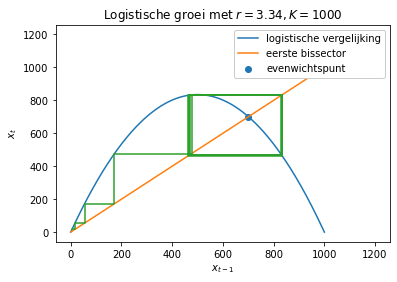

In [12]:
r = 3.34
x_data = list(range(1001))
y_data = [logistische_groei(x, r, K) for x in x_data]
plt.plot(x_data, y_data)
plt.plot([0, 1200], [0, 1200])
x_eq = K * (r - 1) / r
plt.scatter(x_eq, logistische_groei(x_eq, r, K))
x_data = [x_0]
for t in range(50):
    x_t = logistische_groei(x_data[-1], r, K)
    x_data += [x_t] * 2
plt.plot(x_data[:-1], x_data[1:])
plt.legend(['logistische vergelijking', 'eerste bissector', 'evenwichtspunt'],
           loc='upper right', framealpha=1)
plt.xlabel('$x_{t - 1}$')
plt.ylabel('$x_t$')
plt.title('Logistische groei met $r = 3.34, K = 1000$')
plt.show()

Als alles goed is, stel je voor $r = 3.34$ vast dat de groene lijn perfect symmetrisch "terugketst" tussen de logistische vergelijking. We krijgen daardoor de oscillaties die we eerder waarnamen, van de ene toestand naar de andere!

## Opdracht 4

Doe nu hetzelfde voor $r = 3.6$. Wat stel je vast?

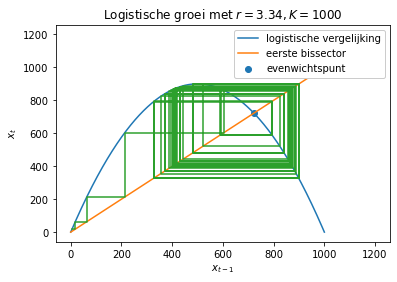

In [13]:
r = 3.6
x_data = list(range(1001))
y_data = [logistische_groei(x, r, K) for x in x_data]
plt.plot(x_data, y_data)
plt.plot([0, 1200], [0, 1200])
x_eq = K * (r - 1) / r
plt.scatter(x_eq, logistische_groei(x_eq, r, K))
x_data = [x_0]
for t in range(50):
    x_t = logistische_groei(x_data[-1], r, K)
    x_data += [x_t] * 2
plt.plot(x_data[:-1], x_data[1:])
plt.legend(['logistische vergelijking', 'eerste bissector', 'evenwichtspunt'],
           loc='upper right', framealpha=1)
plt.xlabel('$x_{t - 1}$')
plt.ylabel('$x_t$')
plt.title('Logistische groei met $r = 3.34, K = 1000$')
plt.show()

De vorm van de logistische verlijking is nu anders, waardoor de bissectrice na de top komt. Voor $r = 3.6$ verspringt de lijn voor en na de top, wat verklaart waarom het gedrag zo onvoorspelbaar is. Er ontstaat een chaotisch regime!

Wat als we kijken naar verschillende waarden voor de groeisnelheid $r$? Dit kunnen we doen aan de hand van een bifurcatieplot. Wat we doen is voor waarden van $r$ van $0$ tot $4$ met tussenstappen van $0.01$ de logistische vergelijking toepassen voor een groot aantal stappen (hier $100$), telkens met alle gehele startwaarden van $1$ tot $K - 1$:

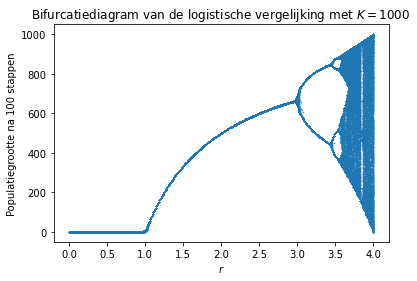

In [14]:
x_data = []
y_data = []
for r in [x / 100 for x in range(401)]:
    for x_0 in range(1, K):
        x = x_0
        for _ in range(100):
            x = logistische_groei(x, r, K)
        x_data.append(r)
        y_data.append(x)
plt.scatter(x_data, y_data, 0.1)
plt.xlabel('$r$')
plt.ylabel('Populatiegrootte na 100 stappen')
plt.title('Bifurcatiediagram van de logistische vergelijking met $K = 1000$')
plt.show()

Hierop kan je onmiddellijk zien welke eindwaarden mogelijk zijn voor bepaalde waarden van $r$. We onderscheiden volgende gevallen:

- Voor $0 < r < 1$ is er geen groei mogelijk, de populatie sterft uit;

- Voor $1 \le r < 3$ zien we convergentie naar $x_{eq}$;

- Voor $3 \le r < 4$ stellen we eerst een splitsing (een bifurcatie) in twee vast, die duidt op een periodieke reeks met periode 2. Voor hogere waarden stellen we een periode van 4 vast, om uiteindelijk naar een chaotisch regime over te gaan.

## Opdracht 5

Stel een bifurcatiediagram op waarbij:

- de draagkracht gelijk is aan $K = 100$
- alle gehele waarden in het interval $[1; K - 1]$ gebruikt worden als de startwaarde $x_0$
- waarden voor $r$ geëvalueerd worden in het interval $[0; 5]$, met tussenstappen van $0.01$
- er 200 generaties beschouwd worden

Wat stel je visueel vast voor waarden van $r > 4$? Als je je afvraagt hoe dit komt, bekijk je best even de gegenereerde populatiegroottes in de lijst `y_data`. Wat stel je vast?

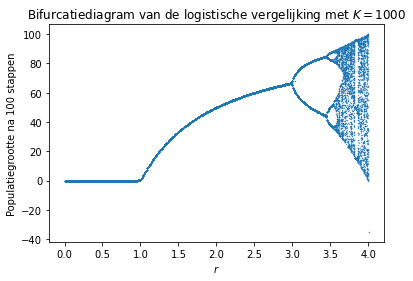

In [15]:
K = 100
x_data = []
y_data = []
for r in [x / 100 for x in range(501)]:
    for x_0 in range(1, K):
        x = x_0
        for _ in range(200):
            x = logistische_groei(x, r, K)
        x_data.append(r)
        y_data.append(x)
plt.scatter(x_data, y_data, 0.1)
plt.xlabel('$r$')
plt.ylabel('Populatiegrootte na 100 stappen')
plt.title('Bifurcatiediagram van de logistische vergelijking met $K = 1000$')
plt.show()

In [16]:
print(y_data[-10:])

[-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf]


Voor $r > 4$, kan de populatiegrootte negatief worden. Dit leidt tot ongeldige resultaten, die algauw escaleren tot extreem negatieve waarden. Deze worden niet geplot, omdat ze gemapt worden op min oneindig. Bifurcatiediagrammen zullen dus nooit geplot worden voor $r > 4$.

## De insecten voorbij

De logistische vergelijking is enorm belangrijk, niet omdat ze biologisch gezien zo realistisch is, maar omdat het een van de simpelste manieren is om een chaotische reeks te genereren. Chaostheorie, de wetenschap dat kleine oorzaken grote, onverwachte gevolgen kunnen hebben, is een relatief jonge tak van de wiskunde. Ze kon pas bloeien in de 20ste eeuw, toen computers het mogelijk maakten om snel computationele experimenten uit te voeren (zoals wij hier gedaan hebben).

Een van de pioniers in dit veld was de weerkundige Edward Lorenz. Terwijl hij experimenteerde met een eenvoudig weermodel rondde hij de getallen af van zes naar drie cijfers om de berekeningen sneller te laten lopen. Tot ontsteltenis van de wetenschappelijke gemeenschap, die er tot dan van uitging dat deze afronding slechts in een triviale afrondingsfout zou resulteren, werd vastgesteld dat deze tot significant verschillende uitkomsten leidde. Tegenwoordig is het algemeen aanvaard dat systemen zoals het weer (en de stromingen van vloeistoffen in het algemeen) chaotisch zijn. Dit maakt het zo goed als onmogelijk om het weer meer dan een week op voorhand nauwkeurig te voorspellen. Onderstaande grafiek toont dit aan:

![Weersvoorspelling](files/weersvoorspelling.png "Weersvoorspelling")

Hier zien we de gemiddelde fout tussen de voorspelde en de geobserveerde temperatuur als een functie van het aantal dagen in de toekomst waarvoor we de temperatuur trachten te voorspellen. Als we ons baseren op klimatologische data - bijvoorbeeld door na te gaan hoe warm het typisch is op deze dag van het jaar - dan zien we dat de fout 7 graden Fahrenheit bedraagt, of ongeveer 4 graden Celsius (oranje). Voorspellen we dat de temperatuur de komende dagen niet zal veranderen (blauw), dan verkrijgen we enkel daags nadien een voorspelling die nauwkeuriger is dan deze op basis van klimatologische data. Gebruiken we geavanceerde weersmodellen (grijs), dan zien we dat de afwijking tussen de voorspelde en de werkelijke temperatuur toeneemt naarmate we verder in de tijd proberen te voorspellen. Dit toont aan dat het inderdaad moeilijk is om het weer ver op voorhand te voorspellen!